Bài tập: sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán 
hàng (sale_vn.csv):
- ❖  Đơn biến (phân tích trên 1 cột):
-   Số đơn: so sánh tổng đơn theo chi nhánh, nhóm hàng, giới tính khách hàng, phương thức 
thanh toán (cột Payment)
-   Mỗi đơn hàng có một số mặt hàng, vẽ phân bố số lượng đơn theo số mặt hàng (chẳng hạn 
các đơn hàng có 1,2,3... mặt hàng có số đơn là bao nhiêu?)
-   Thời gian: ngày nào bận rộn nhất tuần? thời điểm nào bận rộn nhất trong ngày?
- ❖  Đa biến (cần kết hợp 2 hay nhiều cột):
-   Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng
-   Thuế: tương tự doanh thu
-   Rating: so sánh rating giữa các nhóm hàng, giữa các ngày trong tuần, giới tính
-   Xem xét mối tương quan giữa các biến dạng số

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Doc file csv
data = pd.read_csv('sale_data_vn.csv', index_col=0)

data.head(10)

,Invoice ID,City,Customer type,Gender,Product_line,Unit_price,Quantity,Tax 5%,cogs,Total,Date,Time,Payment,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,522.83,548.97,1/5/19,13:08,Ewallet,6
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,76.40,80.22,3/8/19,10:29,Cash,7
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,324.31,340.53,3/3/19,13:23,Credit card,6
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,465.76,489.05,1/27/19,20:33,Ewallet,7
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,604.17,634.38,2/8/19,10:37,Ewallet,7
5,699-14-3026,TP HCM,Normal,Nam,Electronic accessories,85.39,7,29.8865,597.73,627.62,3/25/19,18:30,Ewallet,6
6,355-53-5943,Hà Nội,Member,Nữ,Electronic accessories,68.84,6,20.6520,413.04,433.69,2/25/19,14:36,Ewallet,7
7,315-22-5665,TP HCM,Normal,Nữ,Home and lifestyle,73.56,10,36.7800,735.60,772.38,2/24/19,11:38,Ewallet,6
8,665-32-9167,Hà Nội,Member,Nữ,Health and beauty,36.26,2,3.6260,72.52,76.15,1/10/19,17:15,Credit card,7
9,692-92-5582,Đà Nẵng,Member,Nữ,Food and beverages,54.84,3,8.2260,164.52,172.75,2/20/19,13:27,Credit card,8


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product_line   1000 non-null   object 
 5   Unit_price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   cogs           1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 117.2+ KB


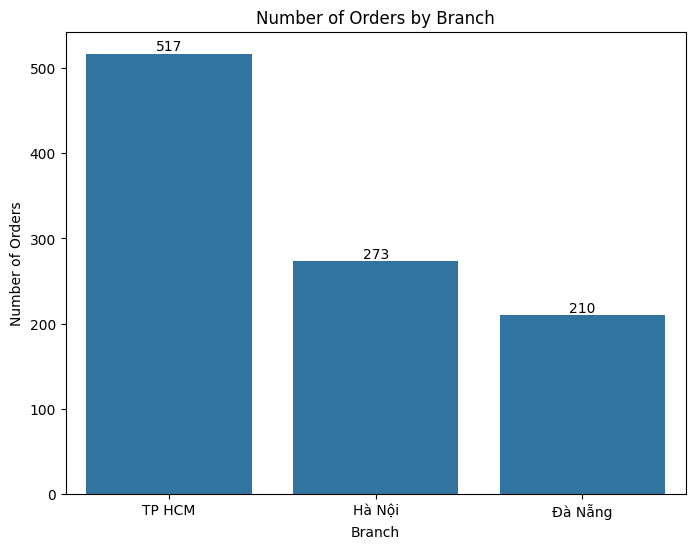

In [9]:
#Number of orders by branch
orders_by_branch = data['City'].value_counts()
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=orders_by_branch.index, y=orders_by_branch.values)
plt.title('Number of Orders by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Orders')
for i, value in enumerate(orders_by_branch.values):
    barplot.text(i, value, str(value), ha='center', va='bottom')
plt.show()

Dựa trên biểu đồ "Number of Orders by Branch" (Số lượng đơn hàng theo chi nhánh), ta có thể nhận xét như sau:

- Biểu đồ cho thấy số lượng đơn hàng được phân phối theo các chi nhánh khác nhau.
- Chi nhánh TP HCM có số lượng đơn hàng cao nhất, tiếp theo là Hà Nội và Đà Nẵng.
- Chi nhánh Hà Nội và Đà Nẵng có số lượng đơn hàng tương đối gần nhau, trong khi chi nhánh Đà Nẵng có số lượng đơn hàng thấp nhất so với hai chi nhánh còn lại.

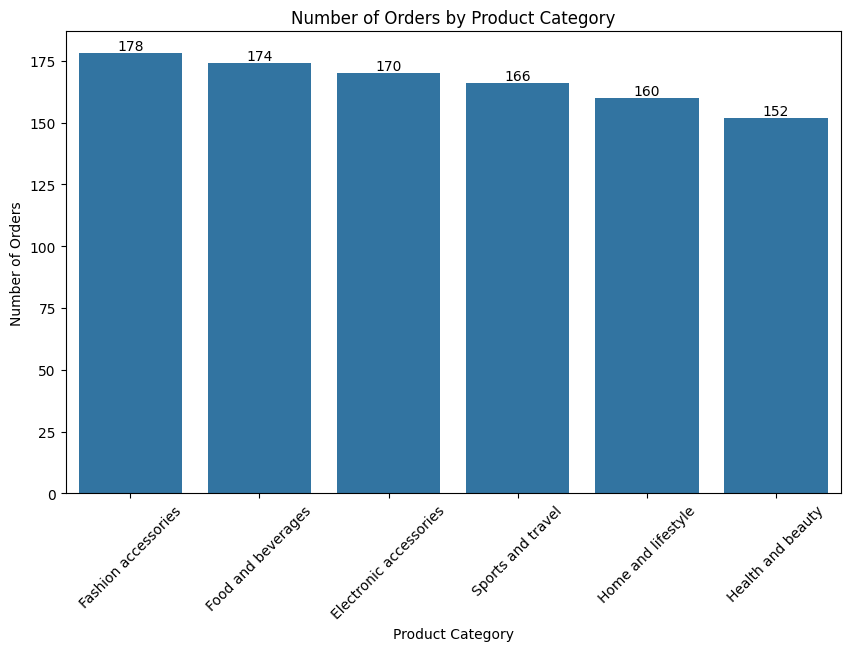

In [11]:
#Number of orders by product category
orders_by_category = data['Product_line'].value_counts()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=orders_by_category.index, y=orders_by_category.values)
plt.title('Number of Orders by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for i, value in enumerate(orders_by_category.values):
    barplot.text(i, value, str(value), ha='center', va='bottom')
plt.show()

Dựa trên biểu đồ "Number of Orders by Product Category" (Số lượng đơn hàng theo danh mục sản phẩm), ta có thể nhận xét như sau:

- Biểu đồ cho thấy số lượng đơn hàng được phân phối theo các danh mục sản phẩm khác nhau.
- Đối với danh mục sản phẩm, "Fashion accessories" có số lượng đơn hàng cao nhất, tiếp theo là "Food and beverages" và "Electronic accessories".
- Số lượng đơn hàng của các danh mục sản phẩm "Health and beauty", "Home and lifestyle" và "Sports and travel" cũng khá đồng đều và tương đối cao.
- Trong khi đó, danh mục sản phẩm "Health and beauty" có số lượng đơn hàng thấp nhất so với các danh mục khác.

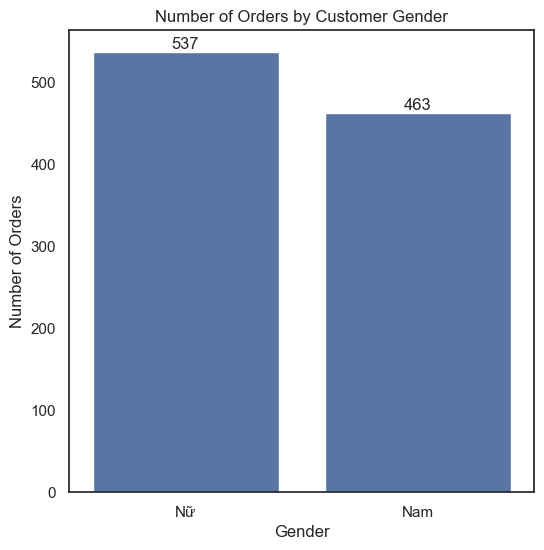

In [ ]:
#Number of orders by customer gender
orders_by_gender = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
barplot = sns.barplot(x=orders_by_gender.index, y=orders_by_gender.values)
plt.title('Number of Orders by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Orders')
for i, value in enumerate(orders_by_gender.values):
    barplot.text(i, value, str(value), ha='center', va='bottom')
plt.show()

Biểu đồ thể hiện số lượng đơn hàng theo giới tính khách hàng:
- Số lượng đơn hàng của khách hàng nữ cao hơn nam: Nữ giới chiếm 537 đơn hàng, cao hơn nam giới 74 đơn (16%).
- Cho thấy khách hàng nữ có nhu cầu mua hàng nhiều hơn nam

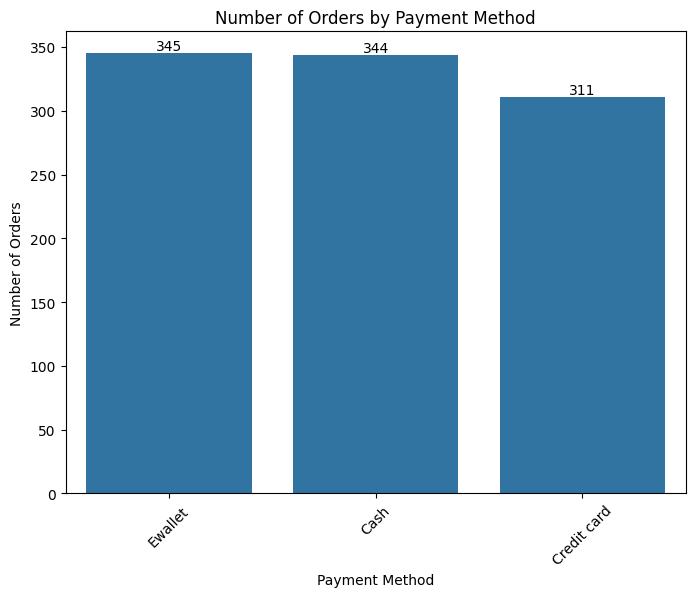

In [12]:
#Number of orders by payment method
orders_by_payment = data['Payment'].value_counts()
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=orders_by_payment.index, y=orders_by_payment.values)
plt.title('Number of Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for i, value in enumerate(orders_by_payment.values):
    barplot.text(i, value, str(value), ha='center', va="bottom")
plt.show()

Biểu đồ thể hiện số lượng đơn hàng theo phương thức thanh toán, bao gồm Ví điện tử, Tiền mặt và Thẻ tín dụng:
- Số lượng đơn hàng tăng đều theo thời gian: Nhìn chung, số lượng đơn hàng có xu hướng tăng đều cho cả ba phương thức thanh toán. Điều này cho thấy sự gia tăng nhu cầu mua sắm của người tiêu dùng.
- Ví điện tử là phương thức thanh toán phổ biến nhất: Ví điện tử là phương thức thanh toán được sử dụng nhiều nhất, với số lượng đơn hàng cao hơn so với Tiền mặt và Thẻ tín dụng.

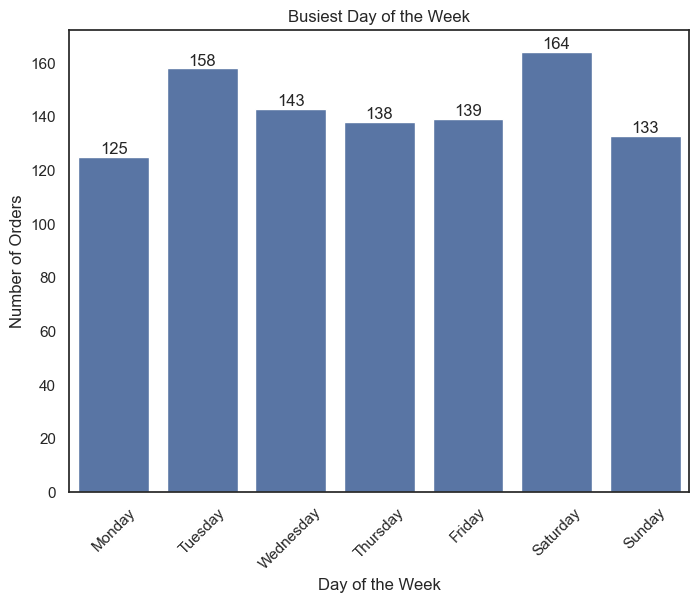

In [ ]:
#Busiest day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
busiest_day = data['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=busiest_day.index, y=busiest_day.values)
plt.title('Busiest Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for i, value in enumerate(busiest_day.values):
    barplot.text(i, value, str(value), ha='center', va='bottom')
plt.show()

Biểu đồ thể hiện số lượng đơn hàng trong ngày bận rộn nhất trong tuần:
- Tổng quan:
    * Trong biểu đồ này, thứ Bảy là ngày bận rộn nhất với 164 đơn hàng, tiếp theo là thứ Ba (158 đơn hàng) và thứ Tư (143 đơn hàng).
    * Thứ Hai (125 đơn hàng) có số lượng đơn hàng thấp nhất.
- Xu hướng:
    * Số lượng đơn hàng có xu hướng tập trung từ thứ Ba đến thứ Bảy.
    * Sau thứ Bảy, cụ thể là từ Chủ nhật đến thứ Hai số lượng đơn hàng giảm.